In [1]:
from Methods_windowing import *

In [3]:
win = Windowing(aggCurves)

,Count
size_train,
16,245
23,246
32,246
40,1
45,244
...,...
1048576,2
1482910,1
1486391,1


In [7]:
win.set_points([16,   23,   32,   45,   64,   91,  128,  181,  256,  362,  512,
        724, 1024], [1448, 2048, 2896], windows=True)

In [8]:
win.MDS()
win.MMF()
win.Last()

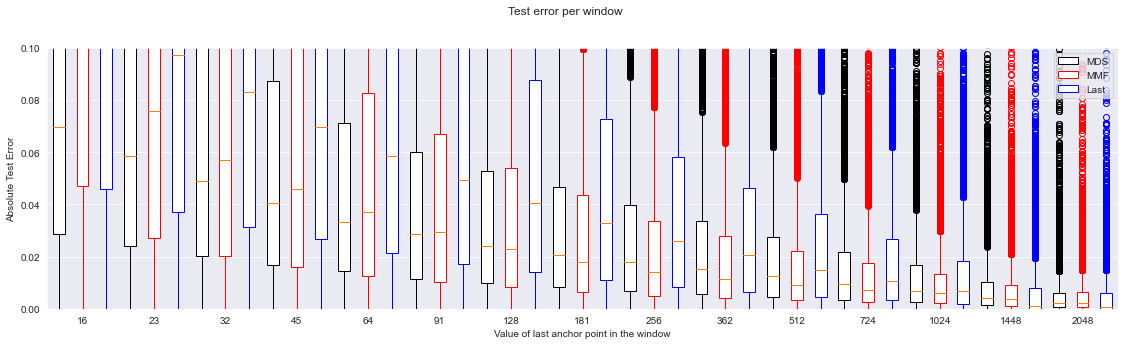

In [10]:
win.Boxplots(ylim=[0,0.1])